## Lab 2 - Thermodynamic assessment of microelectrodes

Notes for the thermal conductivity measurement:
 
1. Use the geometrical details provided for both samples and for the heat-flux sensor

2. Use the heat flux value that actually flows through the sample area, not the average over the sensor’s entire active area.

'Surface_Temperature.xlsx'
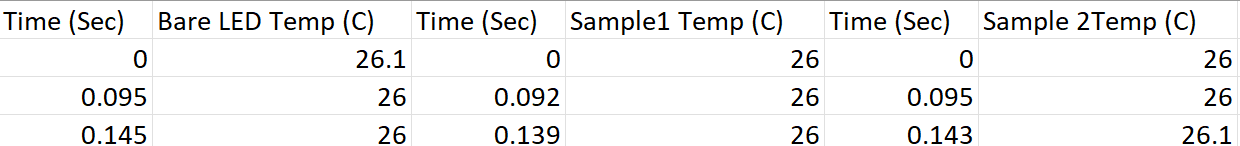

1. Surface Temperature Measurement and Comparison 

- Test two thin film samples. Measure the surface temperature using both an infrared (IR) camera and a thin film thermocouple.
- Prepare a comparison plot of temperature vs. time showing both the heat source temperature and the thin film surface temperature.

'Thermal Conductivity_measurement.xlsx'
Sample1, Sample2, Geometries

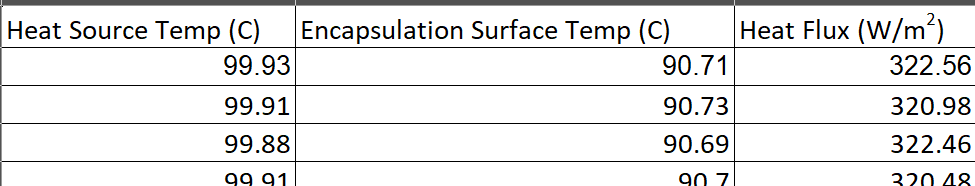

| Samples | Thickness (mm) | width (cm) | Length (cm) |
|---------|-------|------------|-------------|
| Sample 1| 0.25    | 0.3   | 0.9   |
| Sample 2| 0.251    | 0.3      | 0.9|

Heat flux sensor geometry:

Total sensing Area = 6.4516 cm^2

---------------------------------

2. Thermal Conductivity Evaluation

- Measure thermal conductivity of both thin film samples using our customized experimental setup (will be discussed during class).

- Calculate thermal conductivity and compare them. If differences are observed, provide a technical explanation for the discrepancy.

- Clearly state whether the measured conductivity corresponds to in-plane or through-plane behavior.

Kind of sucks to read - hella sample and Time (s) cols

3. Thermal Fatigue Analysis
- Apply thermal fatigue loads at varying frequencies (0.5 Hz, 1 Hz, and 2 Hz). Record and compare the surface thermal profiles of both samples under these conditions.
- Prepare a comparison plot and discuss possible reasons for any differences observed. Why is thermal fatigue analysis important and what are the factors/conditions that alter thermal profiles under fatigue?

-----------------

4. Calibration and Alternative Methods

- Suggest a procedure to calibrate IR camera for accurate surface temperature measurements.

- Propose other thermal conductivity measurement techniques that are simple and cost-effective.